# 決定木

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# データロード
df = sns.load_dataset('tips')
df = pd.get_dummies(df, drop_first=True)
df.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [3]:
# 説明変数、目的変数
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]

In [4]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# 学習
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [6]:
# 予測
y_pred = model.predict(X_test)

In [7]:
# MSE
mean_squared_error(y_test, y_pred)

1.1060246260428703

In [8]:
# modelからR-score
model.score(X_test, y_test)

0.3590618660303134

In [9]:
# r2_scoreからR-score
r2_score(y_test, y_pred)

0.3590618660303134

## 決定木モデル可視化

In [10]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train = df_train[(df_train['total_bill'] > 20.49)]
df_train.describe()['tip']

count    65.000000
mean      3.948000
std       1.585783
min       1.500000
25%       3.000000
50%       3.500000
75%       5.000000
max      10.000000
Name: tip, dtype: float64

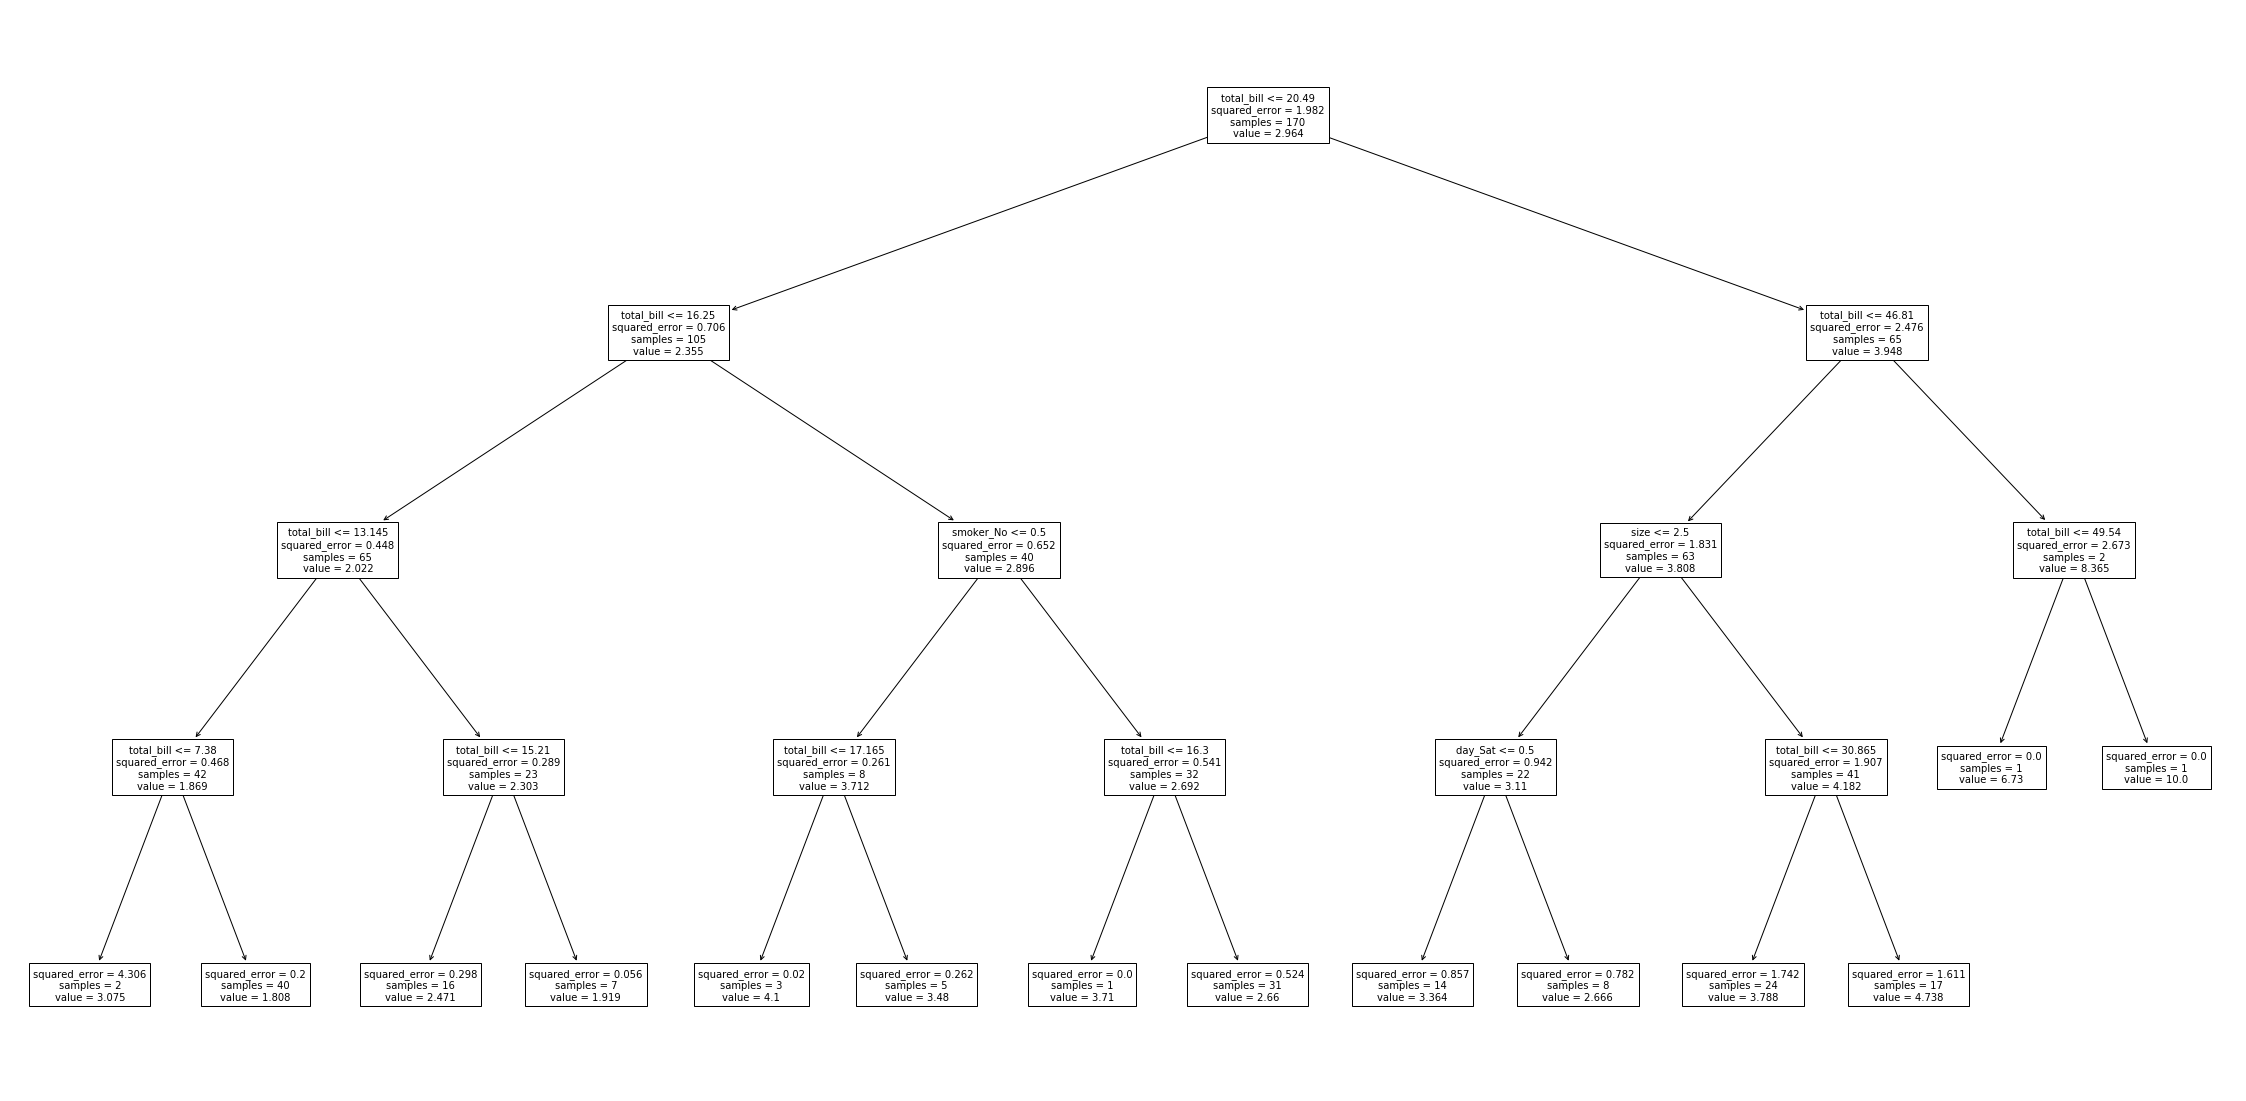

In [11]:
# 決定木描画
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(decision_tree=model,
                   fontsize=10,
                   feature_names=model.feature_names_in_)

In [12]:
# 決定木テキスト
tree_txt = tree.export_text(decision_tree=model,feature_names=list(model.feature_names_in_))
print(tree_txt)

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

## 決定木の特徴量の重要度描画

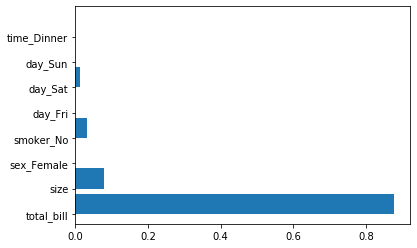

In [13]:
df = pd.DataFrame({'feature_name':model.feature_names_in_, 'feature_importance':model.feature_importances_})
plt.barh('feature_name', 'feature_importance', data=df, align='edge')
plt.xticks([i/10 for i in range(0,10,2)])
plt.show()

## Minimal Cost Complexity Pruning

In [14]:
# alphasリスト導出
model = tree.DecisionTreeRegressor(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
eff_alphas = path.ccp_alphas

In [15]:
# alphasリスト毎にモデル作成し学習
models = []

for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)

In [16]:
# 学習データ、検証データそれぞれでMSEを算出
train_scores = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

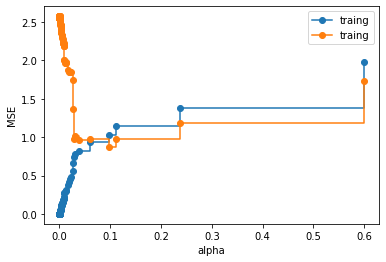

In [17]:
# 損失関数描画
plt.plot(eff_alphas, train_scores, marker='o', label='traing', drawstyle='steps-post')
plt.plot(eff_alphas, test_scores, marker='o', label='traing', drawstyle='steps-post')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()